In [1]:
import pandas as pd
import numpy as np
import statistics
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import cufflinks as cf
from datetime import datetime
from operator import attrgetter
cf.go_offline()
from statsmodels.stats.diagnostic import lilliefors

### STAKEHOLDER: 
* Team Marketing AWS Amazon

## Rumusan Masalah

Tim pemasaran mengalami kesulitan dalam memahami perilaku pelanggan yang tidak konsisten. Situasi ini menyebabkan kebingungan dalam menentukan langkah strategis berikutnya. Oleh karena itu, diperlukan suatu metode untuk mengidentifikasi pola perilaku pelanggan.

1. **Bagaimana karakteristik dan Behavior dari pelanggan AWS Amazon?**

Apabila pola perilaku telah teridentifikasi, diperlukan wawasan dari data tersebut untuk merumuskan langkah-langkah strategis. 
Oleh karena itu, perlu disusun rangkuman singkat mengenai kondisi perilaku pelanggan.
   
2. **buatkan rangkuman singkat mengenai tiap Behavior pelanggan yang dapat digunakan untuk merumuskan langkah-langkah strategis?**

hasil analisis perlu disampaikan kepada tim pemasaran dengan cara yang mudah di mengerti

3. **Bagaimana kita dapat menghadirkan rekomendasi kepada tim pemasaran berdasarkan hasil analisis?**
   

## Tujuan Penelitian


- Mengidentifikasi karakteristik dan Behavior dari pelanggan AWS Amazon Berdasarkan

- Mengidentifikasi Insight yang dapat digunakan dalam merumuskan langkah-langkah strategis

- Menyampaikan hasil analisis dalam bentuk Actionable Recommendation kepada Stakeholder


## Pertanyaan Penelitian

   
1. data-data apa saja yang dapat mengindikasikan behaviour & karakteristik pelanggan?
   
2. Bagaimana melakukan segmentasi pelanggan yang dapat menunjukan behavior pelanggan?



## Analytical Approach

Metode yang akan digunakan adalah RFM (Recency, Frequency, Monetary) analysis, di mana:

- **Recency**: Mengukur jangka waktu sejak transaksi terakhir pelanggan.
  
- **Frequency**: Mengukur jumlah transaksi yang dilakukan oleh pelanggan dalam periode waktu tertentu.
  
- **Monetary**: Mengukur total nilai transaksi yang dilakukan oleh pelanggan.

Analisis akan melibatkan penggunaan algoritma clustering untuk mengelompokkan pelanggan ke dalam segmen berdasarkan nilai RFM yang dihitung.


### Loading dataset

In [2]:
df=pd.read_csv('SaaS-Sales.csv')


## Data Understanding
dfset ini berisi df transaksi dari perusahaan SaaS fiktif yang menjual perangkat lunak penjualan dan pemasaran kepada perusahaan lain (B2B). Dalam dfset ini, setiap baris mewakili satu produk dalam suatu transaksi, dan kolom-kolom mencakup:

Berikut adalah dfset Asli: [Sumber](https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales)

| No. | Column Name    | Description                                                |
|----|----------------|------------------------------------------------------------|
| 1  | Row ID         | Identifikasi unik untuk setiap transaksi.                  |
| 2  | Order ID       | Identifikasi unik untuk setiap pesanan.                    |
| 3  | Order Date     | Tanggal ketika pesanan ditempatkan.                         |
| 4  | Date Key       | Representasi numerik dari tanggal pesanan (YYYYMMDD).       |
| 5  | Contact Name   | Nama orang yang menempatkan pesanan.                       |
| 6  | Country        | Negara tempat pesanan ditempatkan.                         |
| 7  | City           | Kota tempat pesanan ditempatkan.                            |
| 8  | Region         | Wilayah tempat pesanan ditempatkan.                         |
| 9  | Subregion      | Subwilayah tempat pesanan ditempatkan.                      |
| 10 | Customer       | Nama perusahaan yang menempatkan pesanan.                  |
| 11 | Customer ID    | Identifikasi unik untuk setiap pelanggan.                   |
| 12 | Industry       | Industri yang dimiliki oleh pelanggan.                      |
| 13 | Segment        | Segmen pelanggan (SMB, Strategis, Enterprise, dll.).       |
| 14 | Product        | Produk yang dipesan.                                       |
| 15 | License        | Kunci lisensi untuk produk.                                |
| 16 | Sales          | Jumlah penjualan total untuk transaksi.                    |
| 17 | Quantity       | Jumlah total barang dalam transaksi.                       |
| 18 | Discount       | Diskon yang diterapkan pada transaksi.                     |
| 19 | Profit         | Keuntungan dari transaksi.                                  |


## Data Cleaning
* Missing Value : Menggunakan Isna().sum() Untuk mengecheck jumlah missing value tiap kolom

In [3]:
df.isna().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Tidak ditemukan Missing value

* data format: menggunakan describe untuk mengecek data negatif yang tidak masuk akal

In [4]:
df.describe()

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


profit memiliki data negatif namun masih masuk akal karena ini menandakan kerugian setelah di check ulang data negatif hanya keluar saat sebuah produk dijual dengan discount tertentu
dari sini dapat diasumsikan bahwa profit menunjukan keuntungan(nilai positif) dan juga kerugian(nilai negatif)

* Data Types: untuk mengecheck data types yang tidak sesuai


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

Order date perlu dibetulkan typecast dari type object menjadi datetime

In [6]:
df["Order Date"]=pd.to_datetime(df["Order Date"])
df.dtypes

Row ID                   int64
Order ID                object
Order Date      datetime64[ns]
Date Key                 int64
Contact Name            object
Country                 object
City                    object
Region                  object
Subregion               object
Customer                object
Customer ID              int64
Industry                object
Segment                 object
Product                 object
License                 object
Sales                  float64
Quantity                 int64
Discount               float64
Profit                 float64
dtype: object

* Duplicate: mengecheck duplicate

In [7]:
df.nunique()

Row ID          9994
Order ID        5009
Order Date      1237
Date Key        1237
Contact Name     793
Country           48
City             262
Region             3
Subregion         12
Customer          99
Customer ID       99
Industry          10
Segment            3
Product           14
License         9994
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

row id dan license unique value perlu di drop untuk mengcheck duplicates

In [8]:
df.drop(['Row ID','License'], axis=1, inplace=True)
df.duplicated().sum()


1

ditemukan 1 duplicate

In [9]:
df.drop_duplicates()

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820
2,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,EMEA-2020-110422,2020-01-22,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,25.2480,3,0.20,4.1028
9990,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,91.9600,2,0.00,15.6332
9991,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,258.5760,2,0.20,19.3932
9992,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,29.6000,4,0.00,13.3200


* outlier: mengecek data yang jauh dari rata-rata, pengecheckan dilakukan terhadap column dengan tipe data numerik yang akan di pakai dalam analisa

In [10]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR= Q3-Q1
lwrBnd=Q1-(1.5*IQR)
uprBnd=Q3+(1.5*IQR)
outlier=df[(df['Sales'] < lwrBnd) | (df['Sales'] > uprBnd)]
outlier

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820
3,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310
7,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Site Analytics,907.1520,6,0.20,90.7152
10,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ContactMatcher,1706.1840,9,0.20,85.3092
11,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Site Analytics,911.4240,4,0.20,68.3568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9931,AMER-2021-104948,2021-11-13,20211113,Kimberly Newman,United States,Anaheim,AMER,NAMER,Amazon,1004,Tech,SMB,Marketing Suite,683.3320,4,0.15,-40.1960
9942,AMER-2020-143371,2020-12-28,20201228,Carol Forsyth,United States,San Francisco,AMER,NAMER,Nestle,1089,Consumer Products,SMB,Marketing Suite - Gold,998.8200,9,0.00,29.9646
9947,APJ-2023-121559,2023-06-02,20230602,Harry McGrath,India,Delhi,APJ,IND,Valero Energy,1093,Energy,Strategic,FinanceHub,1925.8800,6,0.00,539.2464
9948,APJ-2023-121559,2023-06-02,20230602,Harry McGrath,India,Delhi,APJ,IND,Valero Energy,1093,Energy,Strategic,OneView,2405.2000,8,0.00,793.7160


sales memiliki 1167 outlier namun pengencekan ulang dapat dilihat bahwa column outlier mengkalkulasikan pemasukkan kotor yang telah discount

karena adanya pengaruh column discount, fluctuasi harga dapat dimaklumkan dan outlier masih dalam alam kewajaran. outlier dapat di pertahankan

## Data Prepping

Pembuatan column Order Month untuk menjadi dasar Recency.

In [11]:
df['Order Month']=pd.to_datetime(df['Order Date']).dt.to_period('M')
df['Order Month']=df['Order Month'].dt.to_timestamp()
df.dtypes

Order ID                object
Order Date      datetime64[ns]
Date Key                 int64
Contact Name            object
Country                 object
City                    object
Region                  object
Subregion               object
Customer                object
Customer ID              int64
Industry                object
Segment                 object
Product                 object
Sales                  float64
Quantity                 int64
Discount               float64
Profit                 float64
Order Month     datetime64[ns]
dtype: object

## Analisa RFM

In [12]:
df.head()


,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit,Order Month
0,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136,2022-11-01
1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820,2022-11-01
2,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,14.6200,2,0.00,6.8714,2022-06-01
3,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310,2021-10-01
4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164,2021-10-01


Pertama dilakukan aggregasi untuk melihat karakteristik tiap customer.

order month akan menjadi dasar perhitungan recensy

jumlah order ID menjadi perhitungan frekuensi(di buat count, bukan nunique karena, ada bbrp transaksi 2 produk berbeda yang memiliki order ID yang sama)

sales menjadi dasar monetary values(sales adalah pemasukan kotor, sedangkan profit adalah keuntungan/kerugian bersih. monetary values terfokus terhadap customer maka cost diabaikan, yang dihitung nilai masuk bersih)

In [13]:
dfR=df.groupby('Customer ID').agg({'Order Month' : 'max', 'Order ID' : 'count' , 'Sales' : 'sum'})
dfR=dfR.rename(columns={'Order Month' : 'Order Month', 'Order ID' : 'Freq' , 'Sales' : 'Mon'})
dfR

,Order Month,Freq,Mon
Customer ID,,,
1001,2023-12-01,67,12617.1140
1002,2023-12-01,153,27278.5930
1003,2023-12-01,105,39941.6400
1004,2023-12-01,134,23189.2165
1005,2023-12-01,137,33514.9210
...,...,...,...
1097,2023-12-01,103,29483.0050
1098,2023-12-01,70,22650.8206
1099,2023-12-01,98,23180.5442


Kalkulasi Recency, order month terakhir dianggap tanggal observasi

In [14]:
dfR['Current_Month']=dfR['Order Month'].max()
dfR['Rec']=(dfR['Current_Month']-dfR['Order Month']) // pd.Timedelta(days=30)

Labelling Kriteria RFM masing-masing pelanggan,
rec dicari yang lebih kecil karena menunjukan jangka waktu paling dekat dengan tanggal observasi

In [15]:

MRec=dfR['Rec'].mean()
MFreg=dfR['Freq'].mean()
MMon=dfR['Mon'].mean()
dfR['RecG']=np.where(dfR['Rec']<MRec,1,0)
dfR['FreqG']=np.where(dfR['Freq']>MFreg,1,0)
dfR['MonG']=np.where(dfR['Mon']>MMon,1,0)


segmentasi

In [16]:


conditions = [
    (dfR['RecG'] == 1) & (dfR['FreqG'] == 1) & (dfR['MonG'] == 1),
    (dfR['RecG'] == 1) & (dfR['FreqG'] == 1) & (dfR['MonG'] == 0),
    (dfR['RecG'] == 1) & (dfR['FreqG'] == 0) & (dfR['MonG'] == 1),
    (dfR['RecG'] == 0) & (dfR['FreqG'] == 1) & (dfR['MonG'] == 1),
    (dfR['RecG'] == 1) & (dfR['FreqG'] == 0) & (dfR['MonG'] == 0),
    (dfR['RecG'] == 0) & (dfR['FreqG'] == 1) & (dfR['MonG'] == 0),
    (dfR['RecG'] == 0) & (dfR['FreqG'] == 0) & (dfR['MonG'] == 1)
]

values = [1, 2, 3, 4, 5, 6, 7]


default_value = 8


dfR['label'] = np.select(conditions, values, default=default_value)

dfR


,Order Month,Freq,Mon,Current_Month,Rec,RecG,FreqG,MonG,label
Customer ID,,,,,,,,,
1001,2023-12-01,67,12617.1140,2023-12-01,0,1,0,0,5
1002,2023-12-01,153,27278.5930,2023-12-01,0,1,1,1,1
1003,2023-12-01,105,39941.6400,2023-12-01,0,1,1,1,1
1004,2023-12-01,134,23189.2165,2023-12-01,0,1,1,0,2
1005,2023-12-01,137,33514.9210,2023-12-01,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...
1097,2023-12-01,103,29483.0050,2023-12-01,0,1,1,1,1
1098,2023-12-01,70,22650.8206,2023-12-01,0,1,0,0,5
1099,2023-12-01,98,23180.5442,2023-12-01,0,1,0,0,5


pie plot untuk Menunjukan karakteristik pelanggan AWS berdasar keseluruhan

<Figure size 1400x700 with 0 Axes>

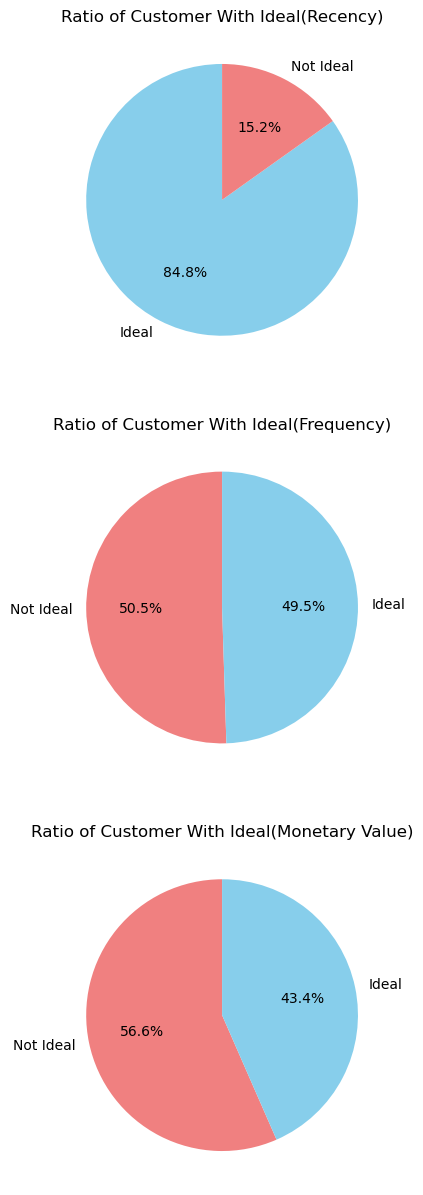

In [17]:
plot=dfR[['label','RecG','FreqG','MonG']]
plt.figure(figsize=(14,7))
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

RecCount=plot['RecG'].value_counts()
FreqCount=plot['FreqG'].value_counts()
MonCount=plot['MonG'].value_counts()

label=['Ideal','Not Ideal']
label2=['Not Ideal','Ideal']
colors = ['skyblue', 'lightcoral']
colors2 = ['lightcoral','skyblue']

axs[0].pie(RecCount, labels=label, autopct='%1.1f%%', colors=colors, startangle=90)
axs[0].set_title('Ratio of Customer With Ideal(Recency)')

axs[1].pie(FreqCount, labels=label2, autopct='%1.1f%%',colors=colors2, startangle=90)
axs[1].set_title('Ratio of Customer With Ideal(Frequency)')

axs[2].pie(MonCount, labels=label2, autopct='%1.1f%%',colors=colors2, startangle=90)
axs[2].set_title('Ratio of Customer With Ideal(Monetary Value)')


plt.show()

Visualisasi RFM Segmentation dengan Scatter plot

In [18]:
plt.figure(figsize=(18, 6))
fig = px.scatter_3d(dfR, x='Rec', y='Mon', z='Freq', color='label', opacity=0.7,
                     title='AWS Customer RFM Segmentation Scatter Plot')
fig.update_layout(scene=dict(xaxis_title='Recency(Month)', yaxis_title='Monetary Values ($)', zaxis_title='Frequency'))
fig.show()


<Figure size 1800x600 with 0 Axes>

In [19]:
dfC=dfR.groupby('label').agg({'RecG' : 'max', 'FreqG' : 'max', 'MonG' : 'max', 'label' : 'count'})
dfC=dfC.rename(columns={'label' : 'count'}).sort_values(by='count', ascending=False)
dfC

,RecG,FreqG,MonG,count
label,,,,
1,1,1,1,35
5,1,0,0,33
8,0,0,0,11
2,1,1,0,10
3,1,0,1,6
4,0,1,1,2
6,0,1,0,2


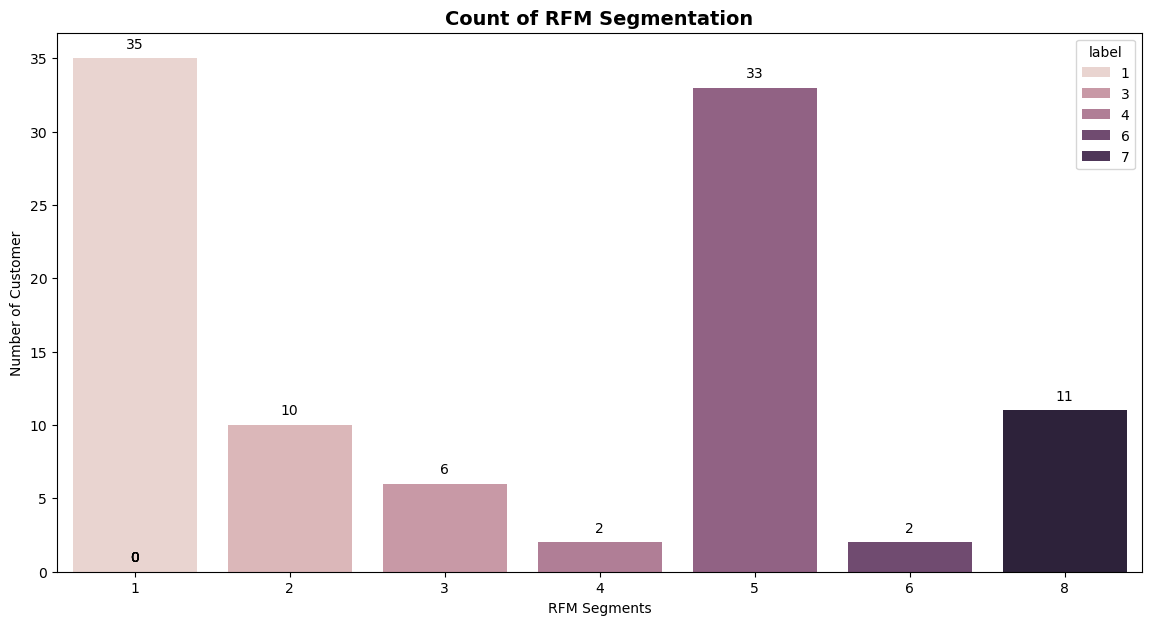

In [22]:
plot=dfC
plt.figure(figsize=(14,7))
ax=sns.barplot(data=plot, x='label', y='count', hue='label')

ax.set_xlabel('RFM Segments')
ax.set_ylabel('Number of Customer')
ax.set_title('Count of RFM Segmentation', fontsize=14, fontweight='bold')


for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.0f}',
            ha='center', va='bottom', fontsize=10)


plt.show()

## Kesimpulan


Secara keseluruhan, pelanggan AWS Amazon masih dapat dikategorikan sebagai aktif, ditandai dengan nilai recency yang rendah. Namun, mereka masih tergolong kurang dalam hal frekuensi dan nilai moneter transaksi.

dari hasil segmentasi, terdapat tiga segmen pelanggan yang dapat diutamakan berdasarkan ukuran mereka.

berikut adalah Karakteristik, behavior & insight yang dapat di ambil dari tiap segment


#### Segmen Pelanggan Ideal (35/99 Total Pelanggan)

- Karakteristik:

1. Recency: Rendah (baru-baru ini melakukan pembelian).
2. Frequency: Tinggi (sering melakukan pembelian).
3. Monetary: Tinggi (berkontribusi banyak ke pemasukan bisnis).

- Kondisi:

1. Pelanggan dalam segmen ini dianggap paling berharga karena mereka sering membeli produk dan kontribusi jumlah uang yang signifikan.
2. Mereka menunjukkan loyalitas tinggi dan memiliki potensi untuk memberikan pendapatan yang berkelanjutan bagi perusahaan.

#### Segmen Active, Jarang Bertransaksi  (33/99 Total Pelanggan)

- Karakteristik:

1. Recency: Rendah (baru-baru ini melakukan pembelian).
2. Frequency: Rendah (jarang melakukan pembelian).
3. Monetary: Rendah (berkontribusi sedikit pemasukan bisnis).

- Kondisi:

1. Pelanggan berada di segmen ini, menunjukkan bahwa mereka belum memberikan kontribusi signifikan terhadap pendapatan.
2. Pelanggan dalam kelompok ini mungkin kurang terlibat atau merasa kurang terhubung dengan platform/produk yang ditawarkan.

#### Segmen Resiko Churn (11/99 Total Pelanggan)

- Karakteristik:

1. Recency: Tinggi (lama melakukan pembelian).
2. Frequency: Rendah (jarang melakukan pembelian).
3. Monetary: Rendah (berkontribusi sedikit pemasukan bisnis).

- Kondisi:

1. Pelanggan dalam segmen ini berisiko tinggi untuk berhenti menjadi pelanggan atau churn.
2. Mereka telah lama tidak melakukan pembelian, menunjukkan kemungkinan minat atau kebutuhan mereka terhadap produk/layanan menurun.
3. Frekuensi dan nilai moneter yang rendah menunjukkan bahwa mereka tidak terlibat secara signifikan dengan platform/produk yang ditawarkan.



# Rekomendasi

berikut diterapkan beberapa usulan strategi pemasaran untuk masing-masing segment yang ter-Highlight

#### Segmen Pelanggan Ideal

- Retensi: Fokus pada program loyalitas dan penghargaan untuk menjaga kepuasan dan keterlibatan mereka.
- Upselling dan Cross-selling: Tawarkan produk tambahan atau premium yang sesuai dengan preferensi mereka.
- Personalization: Berikan penawaran yang dipersonalisasi berdasarkan riwayat pembelian mereka.

#### Segmen Active, Tidak Loyal 

- Engagement: Tingkatkan keterlibatan dengan kampanye pemasaran yang menarik dan relevan.
- Promotions: Tawarkan diskon atau penawaran khusus untuk mendorong pembelian lebih sering.
- Feedback: Kumpulkan masukkan untuk memahami kendala atau hambatan yang mereka hadapi dan perbaiki layanan/produk sesuai kebutuhan mereka.

#### Segmen Resiko Churn

- Reactivation Campaigns: Luncurkan kampanye reaktivasi yang ditargetkan untuk menarik kembali minat mereka. Contoh: email khusus dengan penawaran eksklusif atau diskon yang besar.

In [21]:
# dfF=pd.merge(df,dfR,on='Customer ID',how='left')
# dfF.to_csv('Saas Sales Full.csv')
# dfR.to_csv('Saas Sales RFM.csv')
# plot.to_csv('Saas Sales Group.csv')